In [0]:
import numpy as np
import matplotlib.pyplot as plt

# inner circle

In [0]:
x = np.random.rand(2000) * 2 - 1
y = np.random.rand(2000) * 2 - 1

In [0]:
f = np.sqrt(x ** 2 + y ** 2) < 0.4
f.sum()

238

In [0]:
ax = x[f]
ay = y[f]
alabel = np.zeros(f.sum())

# outer ring

In [0]:
x = np.random.rand(1000) * 2 - 1
y = np.random.rand(1000) * 2 - 1

In [0]:
f1 = np.sqrt(x ** 2 + y ** 2) > 0.7
f2 = np.sqrt(x ** 2 + y ** 2) < 0.9
f = f1 & f2
f.sum()

256

In [0]:
bx = x[f]
by = y[f]
blabel = np.ones(f.sum())

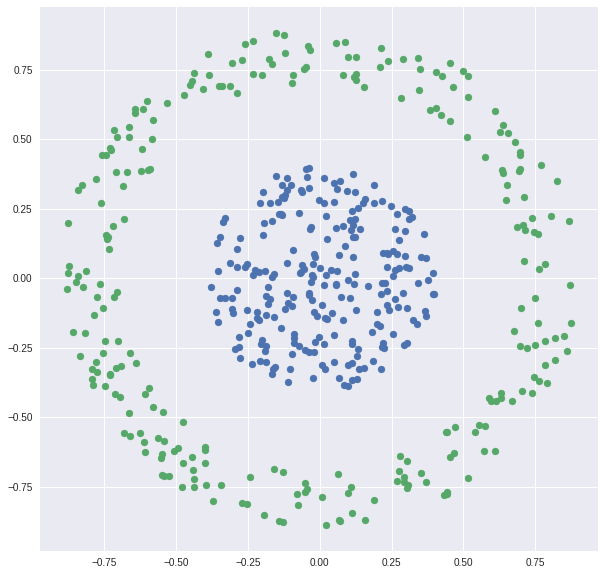

In [0]:
plt.figure(figsize=(10,10))
plt.scatter(ax, ay)
plt.scatter(bx, by)

# combine

In [0]:
label = np.concatenate((alabel, blabel))
label.shape

(494,)

In [0]:
x = np.concatenate((ax, bx))
y = np.concatenate((ay, by))
x.shape

(494,)

In [0]:
(x[0], y[0])

(0.2175064095088226, -0.017807123163533944)

In [0]:
X = np.stack((x, y), axis=-1)
X.shape

(494, 2)

In [0]:
f = np.random.rand(X.shape[0]) < 0.8
Xtrain = X[f]
Xtest = X[~f]
label_train = label[f]
label_test = label[~f]
print(Xtrain.shape)
print(Xtest.shape)

(385, 2)
(109, 2)


# learning

In [0]:
import keras
from keras.layers import *
import tensorflow as tf

Using TensorFlow backend.


In [0]:
TOTAL_CLASS = 2

In [0]:
model = keras.Sequential([
        Dense(4, activation='relu', input_shape=(2,)),    
        Dense(TOTAL_CLASS,  activation='softmax'),    
]) 

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(Xtrain, label_train, epochs=100) # , shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
385/385 [==============================] - 0s 311us/step - loss: 0.6923 - acc: 0.4494
Epoch 2/100
385/385 [==============================] - 0s 45us/step - loss: 0.6888 - acc: 0.4571
Epoch 3/100
385/385 [==============================] - 0s 40us/step - loss: 0.6854 - acc: 0.4649
Epoch 4/100
385/385 [==============================] - 0s 41us/step - loss: 0.6825 - acc: 0.4753
Epoch 5/100
385/385 [==============================] - 0s 48us/step - loss: 0.6798 - acc: 0.4779
Epoch 6/100
385/385 [==============================] - 0s 51us/step - loss: 0.6776 - acc: 0.4857
Epoch 7/100
385/385 [==============================] - 0s 47us/step - loss: 0.6750 - acc: 0.5117
Epoch 8/100
385/385 [==============================] - 0s 52us/step - loss: 0.6727 - acc: 0.5481
Epoch 9/100
385/385 [==============================] - 0s 42us/step - loss: 0.6704 - acc: 0.5558
Epoch 10/100
385/385 [==============================] - 0s 43us/step - loss: 0

In [0]:
test_loss, test_acc = model.evaluate(Xtest, label_test)  

print('Test accuracy:', test_acc)

109/109 [==============================] - 0s 279us/step
Test accuracy: 0.8165137631083847


In [0]:
with open('model.json', 'w') as json_file:
    json = model.to_json()
    json_file.write(json)
model.save_weights('model.h5')

In [0]:
from keras.models import model_from_json

with open('model.json', 'r') as json_file:
    json = json_file.read()
    model2 = model_from_json(json)
model2.load_weights("model.h5")

 
# compile and eval
model2.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
test_loss, test_acc = model2.evaluate(Xtest, label_test)  

print('Test accuracy:', test_acc)

109/109 [==============================] - 0s 492us/step
Test accuracy: 0.8165137631083847
